In [2]:
!pip install gym_super_mario_bros==7.3.0 nes_py

  Created wheel for nes-py: filename=nes_py-8.1.8-cp39-cp39-win_amd64.whl size=47225 sha256=5d999ea54ff91b1245b98a6ef88fbb78fa1784d9f5b6a6c3b26fd4150929eb7d
  Stored in directory: c:\users\shashika\appdata\local\pip\cache\wheels\5b\37\c1\b0eb34358d6e26fac73cbedd57b76d450e3150ab8b2ae16e5e
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=a249dd446dce9146f513ac8c2837cb27cbef284484762dca7e08e97381c86c4b
  Stored in directory: c:\users\shashika\appdata\local\pip\cache\wheels\b3\50\6c\0a82c1358b4da2dbd9c1bb17e0f89467db32812ab236dbf6d5
Successfully built nes-py gym


You should consider upgrading via the 'c:\users\shashika\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT


[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [23]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

NameError: name 'env' is not defined

In [3]:
!pip install torch torchvision torchaudio

You should consider upgrading via the 'c:\users\shashika\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install stable-baselines3[extra]

  Created wheel for atari-py: filename=atari_py-0.2.6-cp39-cp39-win_amd64.whl size=1155035 sha256=37459310f4212cc5aceb472781f58c31bbde62e6c35bcce8a0898180320ac438
  Stored in directory: c:\users\shashika\appdata\local\pip\cache\wheels\5b\1f\fb\f8135d758ce2cd876eefa28f4320702169566d28de4d2e8aa6
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663115 sha256=5518e63299f98af92f68f79577e1283ad6bb63bb2f883b524cdc75e85a983282
  Stored in directory: c:\users\shashika\appdata\local\pip\cache\wheels\46\9f\66\e5922382f4e2ecd0bad129510b758c65f0dbb197d5fc04df9a
Successfully built atari-py gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.0.0
    Uninstalling cloudpickle-2.0.0:
      Successfully uninstalled cloudpickle-2.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0


Reason for being yanked: re-release with new wheels
You should consider upgrading via the 'c:\users\shashika\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [4]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
state = env.reset()

In [ ]:
state, reward, done, info = env.step([5])

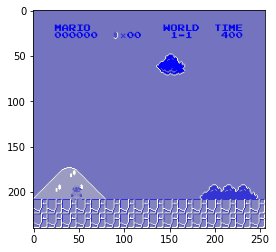

In [16]:
plt.imshow(state[0])

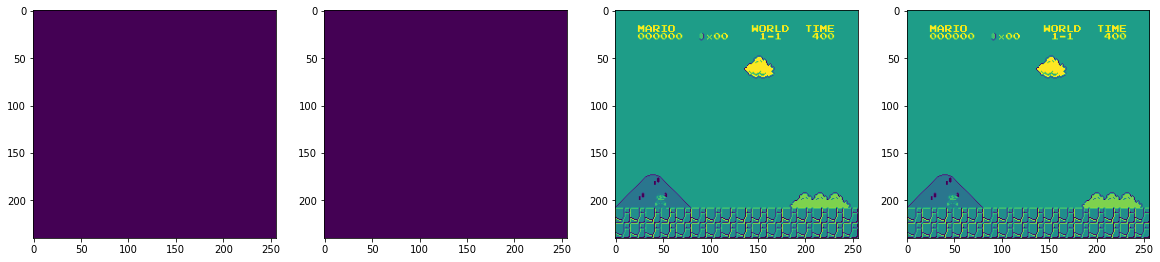

In [19]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [8]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [10]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [11]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [12]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [27]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_1


c:\users\shashika\appdata\local\programs\python\python39\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 12  |
|    iterations      | 1   |
|    time_elapsed    | 41  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 7            |
|    iterations           | 2            |
|    time_elapsed         | 130          |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 7.817312e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | 0.000169     |
|    learning_rate        | 1e-06        |
|    loss                 | 86.3         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000609    |
|    value_loss           | 276          |
------------------------------------------
-----------------------

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 125829120 bytes.

In [13]:
model.save('thisisatestmodel')

In [ ]:
# Load model
model = PPO.load('./train/best_model_200000')

In [ ]:
state = env.reset()

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()